<a href="https://colab.research.google.com/github/MinHyeok-lee1/AICamera/blob/master/Mk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 필요한 라이브러리 다운로드
# Ignore the warnings
# 버전이 바뀌었을때 발생할 수 있는 오류들을 경고해주는 메시지
import warnings
#warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 10
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
# for regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error,  r2_score, mean_absolute_error

In [ ]:
# 2. 데이터 다운로드
# location = 'https://raw.githubusercontent.com/cheonbi/DataScience/master/Data/Bike_Sharing_Demand_Full.csv'

location = '/content/drive/MyDrive/Colab Notebooks/real_data.csv'
raw_all = pd.read_csv(location, skiprows=1)
raw_all

,일자,거래처계층그룹명,품목코드,품명 및 규격,수량,단가,공급가액,부가세,합 계,거래처코드,판매처명,창고명,적요(세금계산서),적요(의무사용량)
0,2020-01-02,부천카포스ㆍ인천대리점소속,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"34,545","34,545","3,455","38,000",3296900193,[부천][카포스]중앙자동차전문정비,본사,택배배송,(SN: 1257)
1,2020-01-02,부천카포스ㆍ인천대리점소속,701,CARGLE P(20L) [20L용기(말통)/5~9개 이용],1,"34,545","34,545","3,455","38,000",1300455482,[부천][카포스]하이퍼자동차공업사,본사,택배배송,(SN 1292)
2,2020-01-02,수원카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"34,545","34,545","3,455","38,000",1240326855,[수원][키포스]개벽카센터,본사,택배배송,(SN: 1280)
3,2020-01-02,수원카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],4,"34,545","138,180","13,820","152,000",1245173984,[수원][카포스]쌍용자동차 권선서비스프라자,본사,택배배송,(SN: 1311)
4,2020-01-02,인천남동구ㆍ인천대리점소속ㆍ인천카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"35,454","35,454","3,546","39,000",1310650072,[인천][카포스]골드자동차공업사,본사,택배배송,(SN: 1260)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,2021-08-31,본사거래처,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],3,"42,727","128,182","12,818","141,000",5040877176,[대구광역시][하이카프라자]대구 침산점/청구스피드라인,로젠(부강),택배발송,(SN:1158)
3452,2021-08-31,본사거래처,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],3,"37,273","111,818","11,182","123,000",5050478355,[경상북도][현대블루핸즈]야사점,로젠(부강),택배발송,(SN：487)거래명세서 발송후 전화하기<br>계좌 : 우리은행 1005-503-4...
3453,2021-08-31,수원카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],2,"37,273","74,545","7,455","82,000",1350656933,[수원][카포스]대원카센타,로젠(부강),택배발송,(SN: 1346)
3454,2021-08-31,화성카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],4,"37,273","149,091","14,909","164,000",1161163795,[화성][카포스]스마트카서비스,로젠(부강),NaN,(SN: 1398)


In [ ]:
# 3. 데이터 전처리 함수
### Functinalize
### Feature engineering of default
def feature_engineering(raw):
    raw_nfe = raw.copy()
    if '일자' in raw_nfe.columns:
        raw_nfe['일자'] = pd.to_datetime(raw_nfe['일자'])
        raw_nfe['DateTime'] = pd.to_datetime(raw_nfe['일자'])
    if raw_nfe.index.dtype == 'int64':
        raw_nfe.set_index('DateTime', inplace=True)
    # bring back
    #if raw_nfe.index.dtype != 'int64':
    #     raw_nfe.reset_index(drop=False, inplace=True)
    return raw_nfe
raw_rd = feature_engineering(raw_all)
raw_rd

,일자,거래처계층그룹명,품목코드,품명 및 규격,수량,단가,공급가액,부가세,합 계,거래처코드,판매처명,창고명,적요(세금계산서),적요(의무사용량)
DateTime,,,,,,,,,,,,,,
2020-01-02,2020-01-02,부천카포스ㆍ인천대리점소속,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"34,545","34,545","3,455","38,000",3296900193,[부천][카포스]중앙자동차전문정비,본사,택배배송,(SN: 1257)
2020-01-02,2020-01-02,부천카포스ㆍ인천대리점소속,701,CARGLE P(20L) [20L용기(말통)/5~9개 이용],1,"34,545","34,545","3,455","38,000",1300455482,[부천][카포스]하이퍼자동차공업사,본사,택배배송,(SN 1292)
2020-01-02,2020-01-02,수원카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"34,545","34,545","3,455","38,000",1240326855,[수원][키포스]개벽카센터,본사,택배배송,(SN: 1280)
2020-01-02,2020-01-02,수원카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],4,"34,545","138,180","13,820","152,000",1245173984,[수원][카포스]쌍용자동차 권선서비스프라자,본사,택배배송,(SN: 1311)
2020-01-02,2020-01-02,인천남동구ㆍ인천대리점소속ㆍ인천카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"35,454","35,454","3,546","39,000",1310650072,[인천][카포스]골드자동차공업사,본사,택배배송,(SN: 1260)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,2021-08-31,본사거래처,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],3,"42,727","128,182","12,818","141,000",5040877176,[대구광역시][하이카프라자]대구 침산점/청구스피드라인,로젠(부강),택배발송,(SN:1158)
2021-08-31,2021-08-31,본사거래처,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],3,"37,273","111,818","11,182","123,000",5050478355,[경상북도][현대블루핸즈]야사점,로젠(부강),택배발송,(SN：487)거래명세서 발송후 전화하기<br>계좌 : 우리은행 1005-503-4...
2021-08-31,2021-08-31,수원카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],2,"37,273","74,545","7,455","82,000",1350656933,[수원][카포스]대원카센타,로젠(부강),택배발송,(SN: 1346)


In [ ]:
raw_01 = raw_rd.groupby('거래처코드').get_group('8968700528')
raw_01

,일자,거래처계층그룹명,품목코드,품명 및 규격,수량,단가,공급가액,부가세,합 계,거래처코드,판매처명,창고명,적요(세금계산서),적요(의무사용량)
DateTime,,,,,,,,,,,,,,
2020-01-13,2020-01-13,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
2020-01-15,2020-01-15,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
2020-01-16,2020-01-16,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
2020-02-13,2020-02-13,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
2020-02-17,2020-02-17,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,2021-03-15,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배발송(10통중5통선발송),(SN：463)매달 25일계산서 발행하면 바로결제
2021-03-19,2021-03-19,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배발송(10통중5통선발송),(SN：463)매달 25일계산서 발행하면 바로결제
2021-04-16,2021-04-16,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],10,"31,818","318,182","31,818","350,000",8968700528,[광주][기아오토큐] 월계점,본사,택배발송,(SN：463)매달 25일계산서 발행하면 바로결제


In [ ]:
# 4 데이터를 단위별로 만들기
#raw_rd.asfreq('H').index #시간단위로 되어있다. 
raw_01.asfreq('D').index #일별데이터로 바꿔줌
# raw_rd.asfreq('W')

DatetimeIndex(['2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22',
               ...
               '2021-05-20', '2021-05-21', '2021-05-22', '2021-05-23',
               '2021-05-24', '2021-05-25', '2021-05-26', '2021-05-27',
               '2021-05-28', '2021-05-29'],
              dtype='datetime64[ns]', name='DateTime', length=503, freq='D')

In [ ]:
raw_01

,일자,거래처계층그룹명,품목코드,품명 및 규격,수량,단가,공급가액,부가세,합 계,거래처코드,판매처명,창고명,적요(세금계산서),적요(의무사용량)
DateTime,,,,,,,,,,,,,,
2020-01-13,2020-01-13,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
2020-01-15,2020-01-15,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
2020-01-16,2020-01-16,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
2020-02-13,2020-02-13,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
2020-02-17,2020-02-17,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,2021-03-15,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배발송(10통중5통선발송),(SN：463)매달 25일계산서 발행하면 바로결제
2021-03-19,2021-03-19,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배발송(10통중5통선발송),(SN：463)매달 25일계산서 발행하면 바로결제
2021-04-16,2021-04-16,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],10,"31,818","318,182","31,818","350,000",8968700528,[광주][기아오토큐] 월계점,본사,택배발송,(SN：463)매달 25일계산서 발행하면 바로결제


In [ ]:
raw_01.asfreq('D').isnull().sum()

일자           480
거래처계층그룹명     480
품목코드         480
품명 및 규격      480
수량           480
            ... 
거래처코드        480
판매처명         480
창고명          480
적요(세금계산서)    480
적요(의무사용량)    480
Length: 14, dtype: int64

In [ ]:
# setting frequency of time series data
raw_01 = raw_01.asfreq('D', method='ffill') #앞에 있는 데이터로 뒤에 있는 값을 채운다.
raw_01

,일자,거래처계층그룹명,품목코드,품명 및 규격,수량,단가,공급가액,부가세,합 계,거래처코드,판매처명,창고명,적요(세금계산서),적요(의무사용량)
DateTime,,,,,,,,,,,,,,
2020-01-13,2020-01-13,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
2020-01-14,2020-01-13,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
2020-01-15,2020-01-15,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
2020-01-16,2020-01-16,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
2020-01-17,2020-01-16,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,2021-05-10,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],10,"31,818","318,182","31,818","350,000",8968700528,[광주][기아오토큐] 월계점기아오토큐 주식회사,본사,택배발송,(SN：463)매달 25일계산서 발행하면 바로결제
2021-05-26,2021-05-10,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],10,"31,818","318,182","31,818","350,000",8968700528,[광주][기아오토큐] 월계점기아오토큐 주식회사,본사,택배발송,(SN：463)매달 25일계산서 발행하면 바로결제
2021-05-27,2021-05-10,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],10,"31,818","318,182","31,818","350,000",8968700528,[광주][기아오토큐] 월계점기아오토큐 주식회사,본사,택배발송,(SN：463)매달 25일계산서 발행하면 바로결제


In [ ]:
# 거래처 코드로 전체 분류하는 방법
raw = raw_rd.groupby('거래처코드')
raw.groups

{'1010327977': [2020-05-29 00:00:00, 2020-08-13 00:00:00, 2020-11-03 00:00:00, 2021-01-13 00:00:00], '10175': [2020-02-10 00:00:00], '10176': [2020-01-15 00:00:00, 2020-02-25 00:00:00, 2020-03-23 00:00:00, 2020-05-13 00:00:00, 2020-06-29 00:00:00, 2020-08-05 00:00:00, 2020-09-22 00:00:00, 2020-11-04 00:00:00], '10189': [2020-01-13 00:00:00, 2020-01-15 00:00:00, 2020-02-18 00:00:00, 2020-02-28 00:00:00, 2020-04-02 00:00:00, 2020-09-25 00:00:00, 2020-10-16 00:00:00, 2020-12-09 00:00:00, 2021-03-08 00:00:00, 2021-05-28 00:00:00], '10192': [2020-01-13 00:00:00, 2020-02-20 00:00:00, 2020-02-28 00:00:00, 2020-05-14 00:00:00, 2020-08-04 00:00:00, 2020-09-08 00:00:00, 2020-10-06 00:00:00, 2020-10-26 00:00:00, 2020-11-27 00:00:00, 2020-12-14 00:00:00, 2021-01-08 00:00:00, 2021-01-29 00:00:00, 2021-02-15 00:00:00, 2021-03-24 00:00:00, 2021-04-16 00:00:00, 2021-04-28 00:00:00, 2021-05-24 00:00:00, 2021-06-11 00:00:00, 2021-06-30 00:00:00, 2021-07-16 00:00:00, 2021-08-04 00:00:00, 2021-08-25 00:00

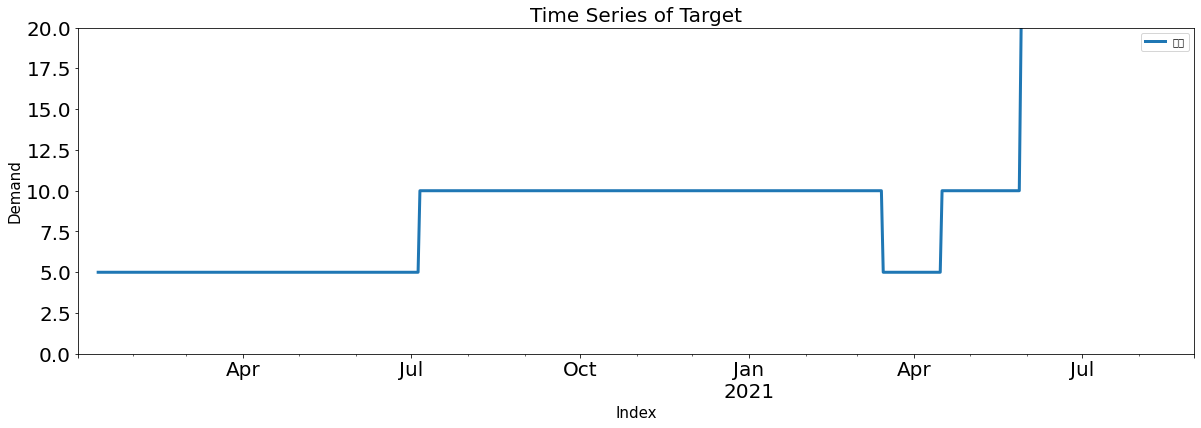

In [ ]:
# 수량과 관계가 있는 변수 registered, casual이 있을 때
# raw_all[['수량','단가','합계']].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20, xlim=('2012-01-01', '2012-06-01'), ylim=(0,200))
# plt.title('Time Series of Target', fontsize=20)
# plt.xlabel('Index', fontsize=15)
# plt.ylabel('Demand', fontsize=15)
# plt.show()

# line plot of Y
raw_01['수량']=raw_01['수량'].astype(float)
raw_01[['수량']].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20, xlim=('2020-01-02', '2021-08-31'), ylim=(0,20))
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Demand', fontsize=15)
plt.show()

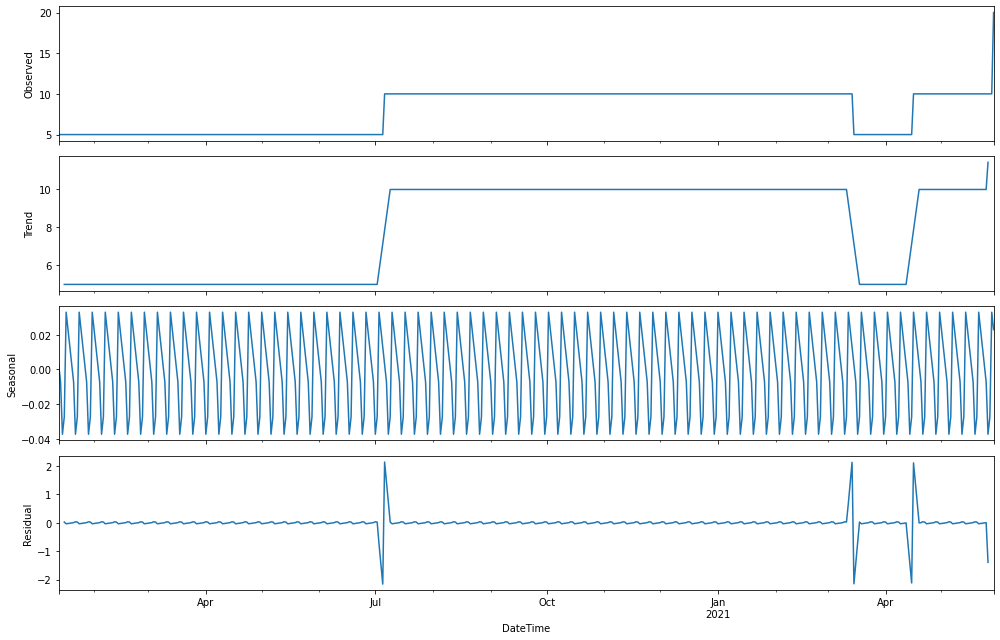

In [ ]:
# split data as trend + seasonal + residual
plt.rcParams['figure.figsize'] = (14, 9)
sm.tsa.seasonal_decompose(raw_01['수량'], model='additive').plot() 
plt.show()

# sm.tsa.seasonal_decompose는 계절성을 없애는 함수이며
# model = additive는 trend, seasonal, residual가 더히기(+)로 이루어져 있을 것이다라는 것이다.

In [ ]:
# 수치로 출력
result = sm.tsa.seasonal_decompose(raw_01['수량'], model='additive')
result.observed

DateTime
2020-01-13    5.00
2020-01-14    5.00
2020-01-15    5.00
2020-01-16    5.00
2020-01-17    5.00
              ... 
2021-05-25   10.00
2021-05-26   10.00
2021-05-27   10.00
2021-05-28   10.00
2021-05-29   20.00
Freq: D, Name: 수량, Length: 503, dtype: float64

In [ ]:
result.trend 
# trend에 nan이 있는데 실제로는 그게 아님
# trend를 만드려면 여러개가 있어야 하는데 초반과 끝부분은 그게 없어서 그렇기 때문

DateTime
2020-01-13     nan
2020-01-14     nan
2020-01-15     nan
2020-01-16    5.00
2020-01-17    5.00
              ... 
2021-05-25   10.00
2021-05-26   11.43
2021-05-27     nan
2021-05-28     nan
2021-05-29     nan
Freq: D, Name: 수량, Length: 503, dtype: float64

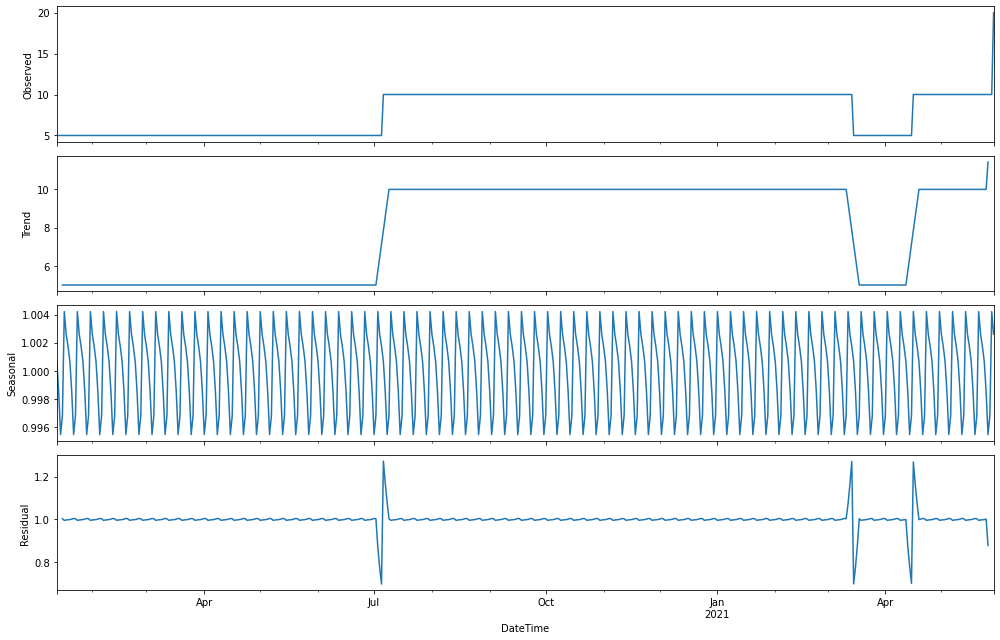

In [ ]:
# split data as trend * seasonal * residual
sm.tsa.seasonal_decompose(raw_01['수량'], model='multiplicative').plot() 
plt.show()

# model = multiplicative은 trend, seasonal, residual가 곱하기(*)로 이루어져 있을 것이다라는 것이다.
# 따라서 도메인의 특성에 따라 additive, multiplicative를 선택해야 한다.

In [ ]:
# fill nan as some values of data
result = sm.tsa.seasonal_decompose(raw_01['수량'], model='additive')
Y_trend = pd.DataFrame(result.trend)
Y_trend.fillna(method='ffill', inplace=True) #trend의 nan값 채우기(뒤에 있는 nam값들 앞 값드로 채우기)
Y_trend.fillna(method='bfill', inplace=True) #trend의 nan값 채우기(앞에 있는 nam값들 뒤 값들로 채우기)
Y_trend.columns = ['count_trend'] 

Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method='ffill', inplace=True) #seasonal의 nan값 채우기(뒤에 있는 nam값들 앞 값드로 채우기)
Y_seasonal.fillna(method='bfill', inplace=True) #seasonal의 nan값 채우기(앞에 있는 nam값들 뒤 값들로 채우기)
Y_seasonal.columns = ['count_seasonal']

# merging several columns
raw_fin = pd.concat([raw_01, Y_trend, Y_seasonal], axis=1)
raw_fin

,일자,거래처계층그룹명,품목코드,품명 및 규격,수량,단가,공급가액,부가세,합 계,거래처코드,판매처명,창고명,적요(세금계산서),적요(의무사용량),count_trend,count_seasonal
DateTime,,,,,,,,,,,,,,,,
2020-01-13,2020-01-13,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5.00,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제,5.00,0.00
2020-01-14,2020-01-13,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5.00,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제,5.00,-0.01
2020-01-15,2020-01-15,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5.00,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제,5.00,-0.04
2020-01-16,2020-01-16,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5.00,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제,5.00,-0.03
2020-01-17,2020-01-16,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],5.00,"31,818","159,091","15,909","175,000",8968700528,[광주][기아오토큐] 월계점,본사,택배배송,(SN：463)매달 25일계산서 발행하면 바로결제,5.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25,2021-05-10,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],10.00,"31,818","318,182","31,818","350,000",8968700528,[광주][기아오토큐] 월계점기아오토큐 주식회사,본사,택배발송,(SN：463)매달 25일계산서 발행하면 바로결제,10.00,-0.01
2021-05-26,2021-05-10,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],10.00,"31,818","318,182","31,818","350,000",8968700528,[광주][기아오토큐] 월계점기아오토큐 주식회사,본사,택배발송,(SN：463)매달 25일계산서 발행하면 바로결제,11.43,-0.04
2021-05-27,2021-05-10,광주,702,CARGLE P(20L) [20L용기(말통)/10개이상 이용],10.00,"31,818","318,182","31,818","350,000",8968700528,[광주][기아오토큐] 월계점기아오토큐 주식회사,본사,택배발송,(SN：463)매달 25일계산서 발행하면 바로결제,11.43,-0.03


1주차 작업 끝 // 알게된 것: 일자로 시계열 분석을 할 때 일자가 하나만 있어야 한다. 이에따라 회사를 하나만 시계열 분석을 진행하였는데 수량이 너무 적어 다음에는 전체 엑셀을 하나의 날자로 수량만 모아서 사계열 분석을 실시할 예정.

In [ ]:
raw_rd = raw_rd.query('거래처계층그룹명 != "합계"')
raw_rd

,일자,거래처계층그룹명,품목코드,품명 및 규격,수량,단가,공급가액,부가세,합 계,거래처코드,판매처명,창고명,적요(세금계산서),적요(의무사용량)
DateTime,,,,,,,,,,,,,,
2020-01-02,2020-01-02,부천카포스ㆍ인천대리점소속,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"34,545","34,545","3,455","38,000",3296900193,[부천][카포스]중앙자동차전문정비,본사,택배배송,(SN: 1257)
2020-01-02,2020-01-02,부천카포스ㆍ인천대리점소속,701,CARGLE P(20L) [20L용기(말통)/5~9개 이용],1,"34,545","34,545","3,455","38,000",1300455482,[부천][카포스]하이퍼자동차공업사,본사,택배배송,(SN 1292)
2020-01-02,2020-01-02,수원카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"34,545","34,545","3,455","38,000",1240326855,[수원][키포스]개벽카센터,본사,택배배송,(SN: 1280)
2020-01-02,2020-01-02,수원카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],4,"34,545","138,180","13,820","152,000",1245173984,[수원][카포스]쌍용자동차 권선서비스프라자,본사,택배배송,(SN: 1311)
2020-01-02,2020-01-02,인천남동구ㆍ인천대리점소속ㆍ인천카포스,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],1,"35,454","35,454","3,546","39,000",1310650072,[인천][카포스]골드자동차공업사,본사,택배배송,(SN: 1260)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,2021-08-31,대리점,MKP000,SAVER P,16,"350,000","5,600,000","560,000","6,160,000",4130492816,[대리점]엠케이 충남총판(비앤비오토모티브),본사,서산 카이스트정비소 용차발송분,충남총판 tid 6850916
2021-08-31,2021-08-31,본사거래처,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],3,"42,727","128,182","12,818","141,000",5040877176,[대구광역시][하이카프라자]대구 침산점/청구스피드라인,로젠(부강),택배발송,(SN:1158)
2021-08-31,2021-08-31,본사거래처,700,CARGLE P(20L) [20L용기(말통)/1~4개 이용],3,"37,273","111,818","11,182","123,000",5050478355,[경상북도][현대블루핸즈]야사점,로젠(부강),택배발송,(SN：487)거래명세서 발송후 전화하기<br>계좌 : 우리은행 1005-503-4...


In [ ]:
# company_df=raw_rd.astype({'수량':int})
raw_rd['수량']=raw_rd['수량'].astype(int)
company_sum=raw_rd.groupby('일자').sum()[['수량']]
company_sum.asfreq('D').index #일별데이터로 바꿔줌
company_sum.asfreq('D').isnull().sum()
company_sum = company_sum.asfreq('D', method='ffill')
company_sum

,수량
일자,
2020-01-02,10
2020-01-03,9
2020-01-04,9
2020-01-05,9
2020-01-06,19
...,...
2021-08-27,16
2021-08-28,16
2021-08-29,16


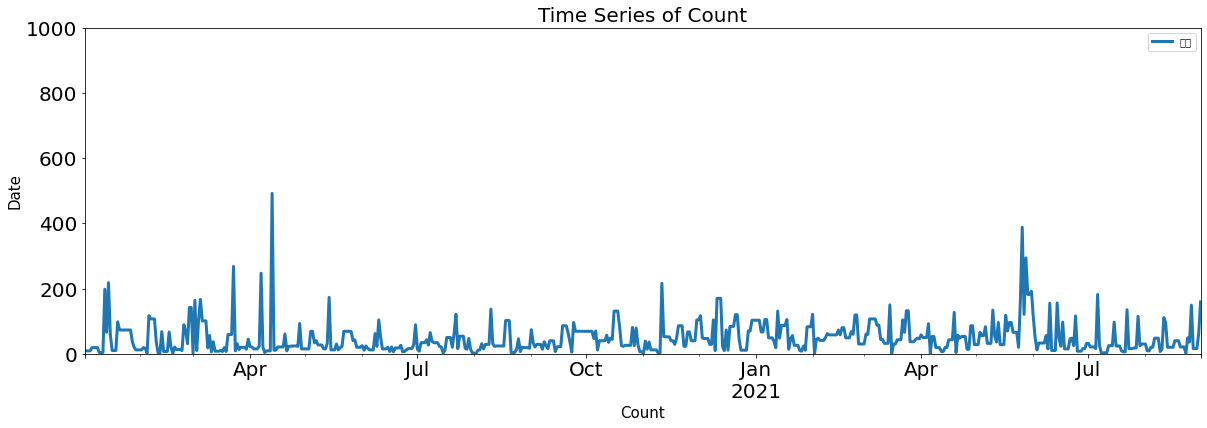

In [ ]:
# line plot of Y
company_sum['수량']=company_sum['수량'].astype(int)
company_sum[['수량']].plot(kind='line', figsize=(20,6), linewidth=3, fontsize=20, xlim=('2020-01-02', '2021-08-31'), ylim=(0,1000))
plt.title('Time Series of Count', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Date', fontsize=15)
plt.show()

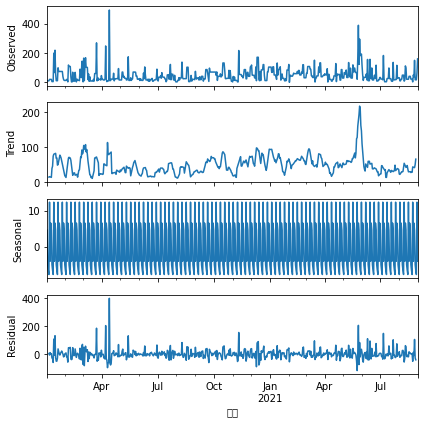

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
sm.tsa.seasonal_decompose(company_sum['수량'], model='additive').plot() 
plt.show()

In [ ]:
result = sm.tsa.seasonal_decompose(company_sum['수량'], model='additive')
result.observed

일자
2020-01-02    10.00
2020-01-03     9.00
2020-01-04     9.00
2020-01-05     9.00
2020-01-06    19.00
              ...  
2021-08-27    16.00
2021-08-28    16.00
2021-08-29    16.00
2021-08-30    63.00
2021-08-31   159.00
Freq: D, Name: 수량, Length: 608, dtype: float64

In [ ]:
result.trend 

일자
2020-01-02     nan
2020-01-03     nan
2020-01-04     nan
2020-01-05   13.43
2020-01-06   14.71
              ... 
2021-08-27   49.29
2021-08-28   65.00
2021-08-29     nan
2021-08-30     nan
2021-08-31     nan
Freq: D, Name: 수량, Length: 608, dtype: float64

In [ ]:
#result = sm.tsa.seasonal_decompose(company_sum['수량'], model='multiplicative').plot() 0이랑 음수가 있어서 안된다
plt.show()

In [ ]:
# fill nan as some values of data
result = sm.tsa.seasonal_decompose(company_sum['수량'], model='additive')
Y_trend = pd.DataFrame(result.trend)
Y_trend.fillna(method='ffill', inplace=True) #trend의 nan값 채우기(뒤에 있는 nam값들 앞 값드로 채우기)
Y_trend.fillna(method='bfill', inplace=True) #trend의 nan값 채우기(앞에 있는 nam값들 뒤 값들로 채우기)
Y_trend.columns = ['count_trend'] 

Y_seasonal = pd.DataFrame(result.seasonal)
Y_seasonal.fillna(method='ffill', inplace=True) #seasonal의 nan값 채우기(뒤에 있는 nam값들 앞 값드로 채우기)
Y_seasonal.fillna(method='bfill', inplace=True) #seasonal의 nan값 채우기(앞에 있는 nam값들 뒤 값들로 채우기)
Y_seasonal.columns = ['count_seasonal']

# merging several columns
raw_fin = pd.concat([company_sum, Y_trend, Y_seasonal], axis=1)
raw_fin

,수량,count_trend,count_seasonal
일자,,,
2020-01-02,10.00,13.43,4.57
2020-01-03,9.00,13.43,-5.05
2020-01-04,9.00,13.43,-6.59
2020-01-05,9.00,13.43,-7.77
2020-01-06,19.00,14.71,12.36
...,...,...,...
2021-08-27,16.00,49.29,-5.05
2021-08-28,16.00,65.00,-6.59
2021-08-29,16.00,65.00,-7.77
